# 시계열 분석

### 시계열 분석과 기계학습의 차이
- 확률과정 : 상관 관계를 가지는 무한개 변수의 순서열
- 시계열 데이터 : 일정한 시간 간격으로 기록된 확률과정의 샘플
#### 기계학습과 시계열 예측간에 큰 차이가 존재하기 때문에 시계열 변수 생성은 조정이 요구됨




## 시계열 모델 종류 및 특징

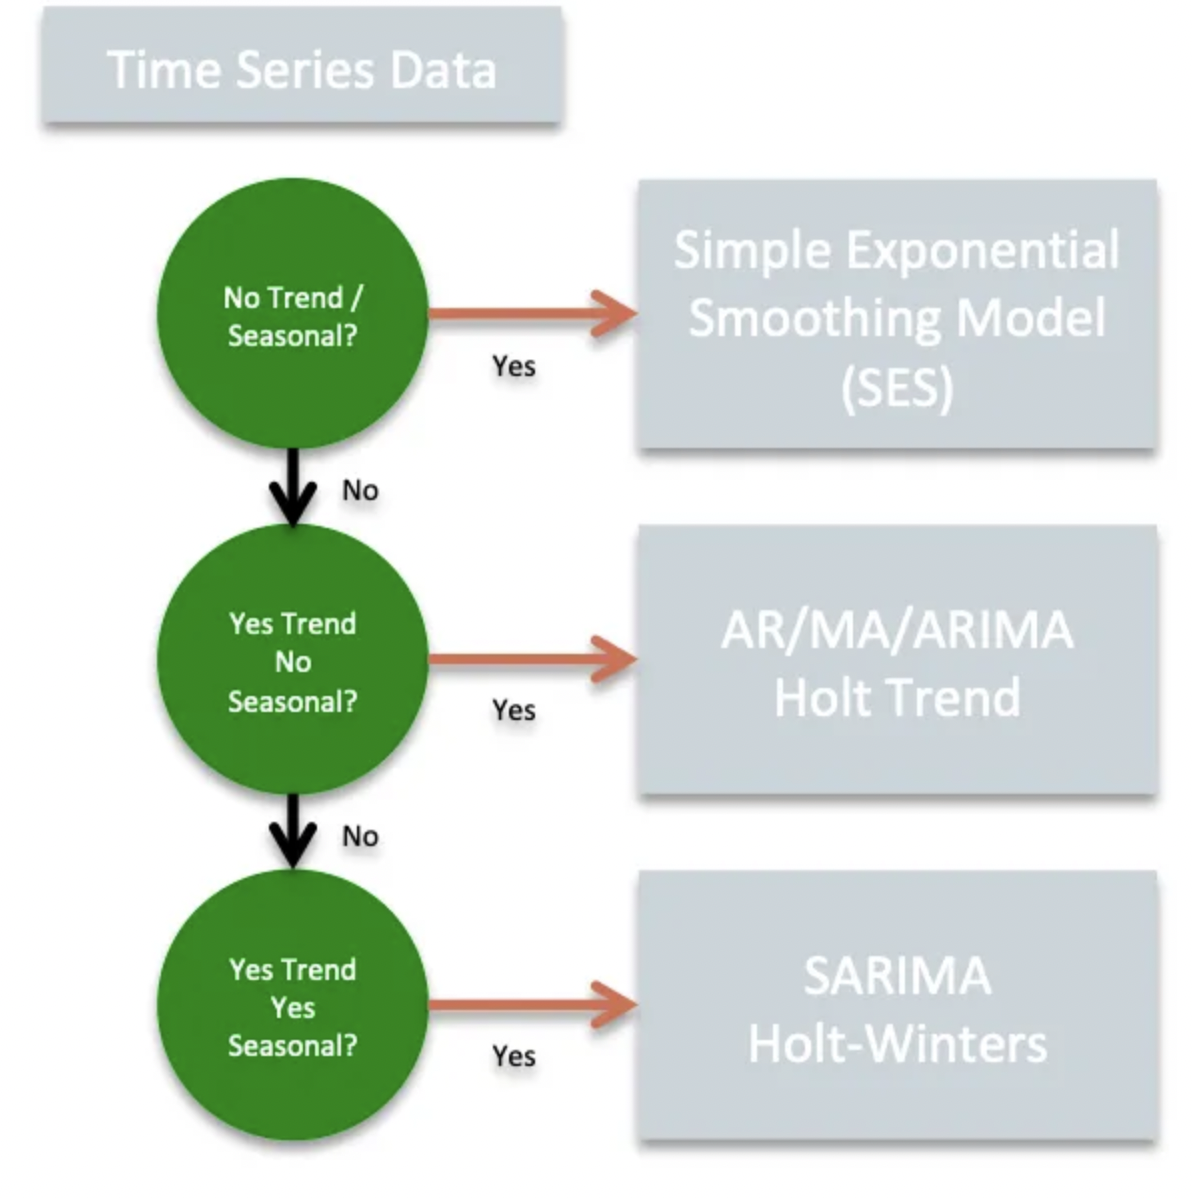

In [5]:
from IPython.display import Image
Image('/Users/kisehyun/Desktop/timeseries.png')

## 일변량 시계열 분석
- 시간을 설명변수로 한 회귀모형으로 하나의 변수에 관심을 갖는 경우의 시계열 분석

***

|확률과정| ACF | PACF |
|---|---|---|
|AR(p) | 지수적으로 감소하거나 소멸하는 싸인함수 형태 | 시차 p이후에는 0으로의 절단형태|
|MA(q)| 시차 q이후에는 0으로의 절단형태 | 지수적으로 감소하거나 소멸하는 싸인함수 형태|
|ARMA(p, q) | 시차(q-p) 이후에는 지수적으로 감소하거나 소멸하는 싸인함수 형태 | 시차(p-q) 이후에는 지수적으로 감소하거나 소멸하는 싸인함수 형태|


### AR(자기회귀모형)
- 가장 기초가 되는 모델로 trend와 seasonal이 없는 시계열의 경우 사용한다. 
- 특정 시점 이전의 값이 이후의 값에 영향을 미치는 경우
- $p$ 시점 전의 자료가 현재 자료에 영향을 주는 모형
- $Z_{t} = \phi_{1}Z_{t-1} + \phi_{2}Z_{t-2} + ... + \phi_{p}Z_{t-p} + \alpha_{t}$
- AR(1) 모형 : $Z_{t} = \phi_{1}Z_{t-1} + \alpha_{t}$로 직전 시점 데이터로만 분석
- AR(2) 모형 : $Z_{t} = \phi_{1}Z_{t-1} + \phi_{2}Z_{t-2} + \alpha_{t}$로 연속된 3시점 정도의 데이터로 분석
- 자기상관함수(ACF)는 빠르게감소하고 부분자기함수(PACF)는 어느 시점에서 절단점을 가진다(ACF가 빠르게 감소하고 PACF가 $n$시점에서 절단점을 갖는 그래프가 있다면 $n-1$시점의 자료까지가 현재에 영향을 미치는 AR(n-1) 모형이라 볼 수 있다.).

### MA(이동평균모형)
- AR모델과 비교했을 때 덜 직관적인 모델
- 시간이 지날수록 어떤 변수의 평균값이 지속적으로 감소하거나 증가하는 경향의 경우
- 유한한 개수의 백색잡음의 결합이므로 언제나 정상성을 만족
- 1차 이동평균모형(MA1 모형)은 이동평균모형 중에서 가장 간단한 모형으로 시계열이 같은 시점의 백색잡음과 바로 전 시점의 백색잡음의 결합으로 이뤄진 모형
- $Z_{t} = \alpha_{t} - \phi_{1}\alpha_{t-1} - \phi_{2}\alpha_{t-2} - ... - \phi_{p}\alpha_{t-p}$
- 2차 이동평균모형(MA(2) 모형)은 바로 전 시점의 백색잡음과 시차가 2인 백색잡음의 결합으로 이뤄진 모형 : $Z_{t} = \alpha_{t} - \phi_{1}\alpha_{t-1}$
- AR 모형과 반대로 ACF에서 절단점을 가지고 PACF가 빠르게 감소

### ARMA & ARIMA()
- ARMA모형을 차분하면 ARIMA 모형
- ARIMA의 모수는 크게 (p, q, r)이 있다.
- 통상적으로 p + q < 2, p * q = 0인 값들을 사용한다.
- ARMIA 모형은 비정상시계열 모형이다.
- 차분이나 변환을 통해 AR모형, MA모형, 이 둘을 합친 ARMA 모형으로 정상화 할 수 있다.
- p는 AR 모형, q는 MA 모형과 관련이 있는 차수이다.
- 시계열 {$Z_{t}$}의 d번 차분한 시계열이 ARMA(p, q)모형이면 시계열{$Z_{t}$}는 차수가 p, d, q인 ARIMA모형, 즉 ARIMA(p,d,q) 모형을 갖는다고 한다.
- d = 0인 경우 ARMA(p,q)모형이라 부르고 이 모형은 정상성을 만족한다.
- p = 0인 경우 IMA(d,q)모형이라 부르고 d번 차분하면 MA(q) 모형을 따른다.
- q = 0인 경우 ARI(p,d)모형이라 부르고 d번 차분하면 AR(p) 모형을 따른다.
- acf,pacf를 통해 정상성을 확인할 수도 있지만, adf검정을 통해 확인할 수 있다.(통계적 방법)

### SARIMA() 
- ARIMA + Seasonal Effect
- 계절성을 ARIMA 모델을 통해 예측한다.
- 즉 non-seasnoality의 ARIMA 모델과 Seasonality만을 모델링한 ARIMA를 결합한 형태
- 기존 ARIMA(p, d, q)에 계절성 주기를 나타내는 차수 s가 필요하며 SARIMA(P, D, Q, s)로 표기한다.
|파라미터 | 설명|
|---|---|
|p| order of non-seasonal AR temrs|
|d|order of non-seasonal differencing|
|q| order of non-seasonal MA terms|
|P| order of seasonal AR terms|
|D| order of seasonal differencing|
|Q|order of seasonal MA terms|
|S| length of the cycle|


## 다변량

### ARIMAX
- AR모형과 MA모형을 동시에 포함한 다변량 시계열 데이터에 적합한 모형
- 일반적인 ARMA 모형에 외생변수 $X$를 포함하여 모형을 수립한다.

### SARIMAX
#### <center><메서드 주요 파라미터><center>
| 파라미터 | 설명 |
|---|---|
|endog | 관측된 시계열 데이터|
| exog | 관측된 시계열에 영향을 미치는 외부 변수 데이터|
| order | ARIMA의 (p, d, q)|
|seasonal_order | SARIMA의 seasonal component인 (P,D,Q,s)|
|enforce_stationay | AR항이 stationary를 만족하게끔 강제하는 것으로 디폴트는 True|
|enforce_invertibility| MA항이 stationary를 만족하게끔 강제하는 것으로 디폴트는 True|
    
### VAR
- 여러 시계열 변수로 구성되며 예측에 매우 유용한 도구
- 자동 회귀(AR) 모형의 확장 버전
- 시계열 변수가 모두 정상성을 만족해야 한다.
    
### VARMAX
- VARMA + 외생변수 활용
***
## 이외의 방법

### 이동평균법
- 과거로부터 현재까지의 시계열 자료를 대상으로 일정기간별 이동평균을 계산하고 이들의 추세를  파악하여 다음 기간을 예측하는 방법
- 시계열자료에서 계절변동과 불규칙변동을 제거하여 추세변동과 순환변동만 가진 시계열로 변환하는 방법으로도 사용됨.

$F_{n + 1}$ = $1 \over m$$(Z_{n} + Z_{n-1} + ... +Z_{n-m+1})$ = $1\over m$$\sum_{t}^nZ_{t}$,    $t = n - m + 1$
- m은 이동평균 기간이고 $Z_{n}$은 가장 최근 시점의 데이터
- n개의 시계열 데이터를 m기간으로 이동평균하면 n-m+1개의 이동평균 데이터가 생성된다.

### 지수평활법
- 모든 시계열 자료를 사용하여 평균을 구하며 시간의 흐름에 따라 최근 시계열에 더 많은 가중치를 부여하여 미래를 예측하는 방법
- $F_{n+1} = \alpha$$Z_{n} + (1-\alpha)F_{n}$ = $\alpha Z_{n}$ + $(1-\alpha$)$[\alpha Z_{n-1} + (1 - \alpha)F_{n-1}]$<br> = $\alpha Z_{n} + \alpha(1-\alpha)Z_{n-1} + (1 - \alpha)^2F_{n-1}$ <br> = $\alpha Z_{n} + \alpha(1 - \alpha)Z_{n-1} + (1 - \alpha)^2[\alpha Z_{n-2} + (1 - \alpha)F_{n-2}]$ <br> = $\alpha Z_{n} + \alpha(1 - \alpha)Z_{n-1} + \alpha(1 - \alpha)^2Z_{n-2} + \alpha(1 - \alpha)^3Z_{n-3} + ....$

- 여기서 $F_{n+1}$은 $n$시점 다음의 예측값, $\alpha$는 지수평활계수, $Z_{n}$은 $n$시점의 관측값이며 지수평활계수가 과거로 갈수록 지수형태로 감소하는 형태인 것을 확인할 수 있다.
#### 지수평활법의 특징
- 단기간에 발생하는 불규칙변동을 평활하는 방법
- 자료의 수가 많고 안정된 패턴을 보이는 경우 예측 품질이 높다.
- 지수평활법에서 가중치의 역할은 지수평활계수($\alpha$)이며 불규칙변동이 큰 시계열의 경우 지수평활계수는 작은 값을, 불규칙변동이 작은 시계열의 경우 큰 값의 지수평활계수를 적용한다.
- 지수평활계수는 예측오차(실제 관측치와 예측치 사이의 잔차제곱합)를 비교하여 예측오차가 가장 작은 값을 선택하는 것이 바람직하다.
- 지수평활계수는 과거로 갈수록 지속적으로 감소함
- 지수평활법은 불규칙변동의 영향을 제거하는 효과가 있으며 중기 예측 이상에 주료 사용된다.(단, 단순지수 평활법은 장기추세나 계절변동이 포함된 시계열의 예측에는 적합하지 않음)

## 과정
- 1. 시계열 Data인가 확인 -> 종속변수가 연속형이고 독립변수 중 시간 관련 변수가 있는지 확인
- 2. 있다면 index를 Date 타입에 맞게 변환(Day, Month, Hour 등등)
- 3. 단변량인지 다변량인지 문제를 확인한다. -> 다변량이라면 VAR, SARIMAX 등 사용
- 4. 데이터의 정상성을 확인한다. -> ADF, KPSS, ACF, PACF
- 5. 정상성을 확보했다면 모델링을 진행한다.
- 6. 변수에 변환을 하고 예측을 했다면 복원해서 예측값을 구한다.
- 7. 잔차 검정을 시행한다. -> 정규성, 등분산성, QQplot, autocorrelation_plot, plot_dianostics 등

In [32]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [45]:
data = pd.read_csv('Unknown.csv')

In [46]:
data.head()

,Timestamp,market-price
0,2020-05-23 00:00:00,9167.26
1,2020-05-24 00:00:00,9178.32
2,2020-05-25 00:00:00,8730.73
3,2020-05-26 00:00:00,8899.66
4,2020-05-27 00:00:00,8842.85


In [47]:
data.Timestamp = pd.to_datetime(data.Timestamp)

In [48]:
data.set_index('Timestamp', inplace = True)

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

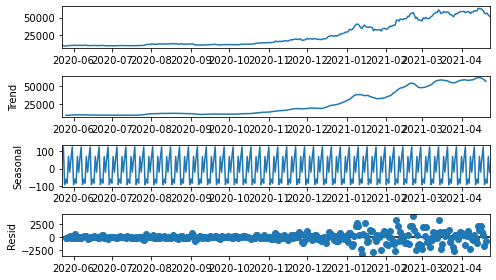

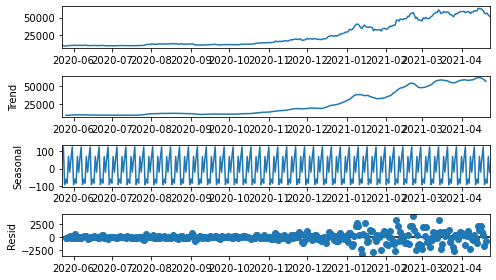

In [50]:
decomposed = seasonal_decompose(y_train, model = 'additive')
decomposed.plot()

In [52]:
data['diff_y'] = data['market-price'].diff()

In [53]:
X = data.dropna()

In [54]:
y_train  = X.iloc[:336]
y_test = X.iloc[336:]

In [55]:
y_train.shape, y_test.shape

((336, 2), (29, 2))

계절성이 존재하기 때문에 차분을 진행한다. 혹은 아래의 방법으로 차분 필요 여부 확보

#### 정상성 확인

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline

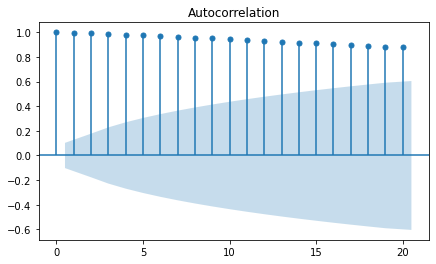

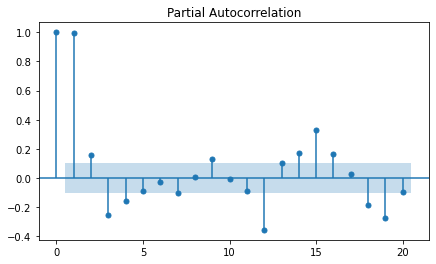

In [38]:
plt.rcParams['figure.figsize'] = (7, 4)
plot_acf(data['market-price'], lags = 20)
plot_pacf(data['market-price'], lags = 20)
plt.show()

PACF에서 AR p 설정, ACF에서 MA q 설정

In [27]:
from statsmodels.tsa.stattools import kpss

In [33]:
statistic, p_value, n_lags, critial_values = kpss(data['market-price'])

print("KPSS Statistic : {}".format(statistic))
print("P-value : {}".format(p_value))
print("num_lags : {}".format(n_lags))
print("Critial_values : {}".format(critial_values))

KPSS Statistic : 1.880449881333393
P-value : 0.01
num_lags : 17
Critial_values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [34]:
statistic, p_value, n_lags, critial_values = kpss(data['market-price'].diff().dropna())

print("KPSS Statistic : {}".format(statistic))
print("P-value : {}".format(p_value))
print("num_lags : {}".format(n_lags))
print("Critial_values : {}".format(critial_values))

KPSS Statistic : 0.17575245159735775
P-value : 0.1
num_lags : 17
Critial_values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


1차 차분 이후 시계열이 안정적이다 라는 귀무가설을 채택한다.

In [28]:
from statsmodels.tsa.stattools import adfuller

In [30]:
y = data['market-price']
y1dif = data['market-price'].diff(periods = 1).dropna()

result = adfuller(y)
print("원 데이터의 ADF 값 : {}".format(result[0]))
print('원 데이터의 P-value : {}\n'.format(result[1]))

result1 = adfuller(y1dif, autolag = None)
print("1차 차분 데이터의 ADF 값 : {}".format(result1[0]))
print('1차 차분 데이터의 P-value : {}'.format(result1[1]))

원 데이터의 ADF 값 : -0.7319298094453697
원 데이터의 P-value : 0.8383047624928699

1차 차분 데이터의 ADF 값 : -4.194649165811992
1차 차분 데이터의 P-value : 0.000672777727758839


1차 차분을 진행하면 정상성을 만족한다.

### AR 사용

In [56]:
from statsmodels.tsa.ar_model import AR

In [59]:
model = AR(y_train['diff_y'])
model_fitted = model.fit()

In [61]:
print(f'필요한 lag 수는 {model_fitted.k_ar}')

필요한 lag 수는 16


In [62]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      d  -                  i                  f
Model:                         AR(16)   Log Likelihood               -2723.605
Method:                          cmle   S.D. of innovations           1202.705
Date:                Thu, 03 Jun 2021   AIC                             14.297
Time:                        16:23:43   BIC                             14.509
Sample:                    05-24-2020   HQIC                            14.382
                         - 04-24-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.0404     77.797      1.916      0.055      -3.440     301.521
L1.diff_y     -0.0390      0.057     -0.679      0.497      -0.152       0.074
L2.diff_y      0.0540      0.058      0.936      0.349      -0.059       0.167
L3.diff_y      0.1338      0.058      2.327      0.020       0.021       0.247
L4.diff_y     -0.0156      0.058     -0.270      0.787      -0.129       0.098
L5.diff_y      0.0213      0.058      0.368      0.713      -0.092       0.135
L6.diff_y      0.0135      0.059      0.230      0.818      -0.102       0.129
L7.diff_y     -0.0868      0.058     -1.500      0.134      -0.200       0.027
L8.diff_y     -0.0673      0.058     -1.154      0.249      -0.182       0.047
L9.diff_y     -0.0216      0.058     -0.370      0.711      -0.136       0.093
L10.diff_y     0.1730      0.058      2.973      0.003       0.059       0.287
L11.diff_y     0.0434      0.060      0.725      0.468      -0.074       0.161
L12.diff_y    -0.0282      0.060     -0.470      0.638      -0.146       0.089
L13.diff_y    -0.1217      0.060     -2.033      0.042      -0.239      -0.004
L14.diff_y    -0.1494      0.060     -2.494      0.013      -0.267      -0.032
L15.diff_y    -0.0745      0.060     -1.232      0.218      -0.193       0.044
L16.diff_y     0.0459      0.061      0.756      0.450      -0.073       0.165
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1458           -0.0000j            1.1458           -0.5000
AR.2            -1.1415           -0.5229j            1.2556           -0.4316
AR.3            -1.1415           +0.5229j            1.2556            0.4316
AR.4            -0.8509           -0.7780j            1.1530           -0.3821
AR.5            -0.8509           +0.7780j            1.1530            0.3821
AR.6            -0.4439           -1.0399j            1.1307           -0.3142
AR.7            -0.4439           +1.0399j            1.1307            0.3142
AR.8            -0.0254           -1.2016j            1.2018           -0.2534
AR.9            -0.0254           +1.2016j            1.2018            0.2534
AR.10            0.4089           -0.9946j            1.0754           -0.1879
AR.11            0.4089           +0.9946j            1.0754            0.1879
AR.12            0.8640           -0.6520j            1.0824           -0.1029
AR.13            0.8640           +0.6520j            1.0824            0.1029
AR.14            1.0734           -0.2376j            1.0994           -0.0347
AR.15            1.0734           +0.2376j            1.0994            0.0347
AR.16            2.9984           -0.0000j            2.9984           -0.0000
------------------------------------------------------------------------------
""

In [63]:
pred = model_fitted.predict(start = y_test.index[0], end = y_test.index[-1])

In [66]:
y_test['pred'] = pred

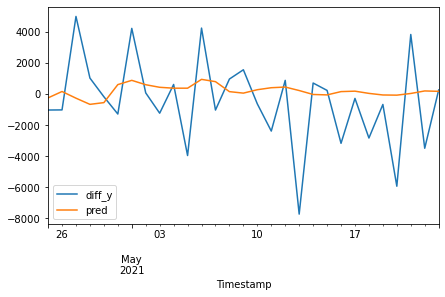

In [71]:
y_test[['diff_y', 'pred']].plot()
plt.show()

In [74]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model_fitted.resid)

1.9982571780429015

통계량이 2에 가깝기 때문에 자기상관을 갖지 않는다.

In [75]:
from sklearn.metrics import mean_squared_error

In [88]:
reverse_pred = data.loc[y_train.index[-1]][0] + y_test['pred'].cumsum()
reverse_actual = y_test['market-price']

In [90]:
import numpy as np

In [91]:
rmse = np.sqrt(mean_squared_error(reverse_actual, reverse_pred))

In [92]:
print(f'AR모형의 RMSE는 {rmse}')

AR모형의 RMSE는 8724.57999653102


***
### ARIMA 모형
- 정상성 검증은 모든 방법과 동일

In [127]:
from statsmodels.tsa.arima_model import ARIMA

In [128]:
def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [129]:
auto_df = my_auto_arima(y_train['market-price'], [3,3,3])
auto_df.sort_values(by = 'AIC')

,order,AIC
6,p0 d2 q1,5713.406315
15,p1 d2 q1,5715.335404
7,p0 d2 q2,5715.340787
22,p2 d1 q2,5716.743976
24,p2 d2 q1,5716.819427
16,p1 d2 q2,5717.299851
25,p2 d2 q2,5718.705891
2,p0 d1 q0,5722.362731
11,p1 d1 q0,5724.283692
3,p0 d1 q1,5724.289571


p = 0, d = 2, q = 1 파라미터가 가장 AIC가 낮은 것으로 나타났다.

In [130]:
order = (0, 2, 1)
model = ARIMA(y_train['market-price'], order)
rfit = model.fit()
rfit.summary() # AIC가 작을수록 좋음

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.market-price   No. Observations:                  334
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -2853.703
Method:                       css-mle   S.D. of innovations           1231.990
Date:                Fri, 04 Jun 2021   AIC                           5713.406
Time:                        09:35:56   BIC                           5724.840
Sample:                    05-26-2020   HQIC                          5717.965
                         - 04-24-2021                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5824      0.696      0.837      0.403      -0.782       1.947
ma.L1.D2.market-price    -1.0000      0.011    -90.498      0.000      -1.022      -0.978
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [131]:
pred = rfit.predict(start = y_test.index[0], end = y_test.index[-1], typ = 'levels')
pred.head()

2021-04-25    51378.652934
2021-04-26    51604.758231
2021-04-27    51831.445892
2021-04-28    52058.715916
2021-04-29    52286.568304
Freq: D, dtype: float64

In [132]:
print(f'ARIMA 모형의 RMSE = {np.sqrt(mean_squared_error(y_test["market-price"], pred))}')

ARIMA 모형의 RMSE = 9028.530812061388


In [133]:
durbin_watson(rfit.resid)

2.032573936708021

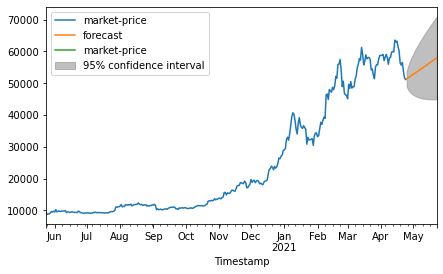

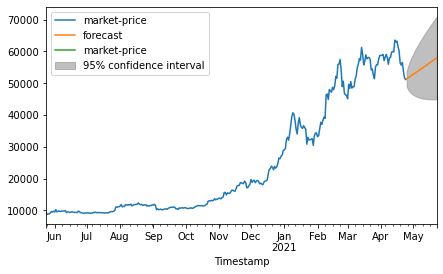

In [135]:
ax = y_train['market-price'].plot()
rfit.plot_predict(start = y_test.index[0], end = y_test.index[-1], ax = ax)

***
### SARIMA
- Seasonality의 시계열 데이터에 ARIMA를 적용해도 되지만 많은 차분이 필요하므로 보통 적합하지 않다.

In [315]:
data = pd.read_csv("city_day.csv")

In [316]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [317]:
data = data[data.City == 'Delhi'][['Date', 'AQI']]

In [318]:
data['Date'] = pd.to_datetime(data['Date'])

In [319]:
data.set_index("Date", inplace = True)

In [320]:
data = data.asfreq(freq = 'D').dropna()

In [321]:
data.head()

,AQI
Date,
2015-01-01,472.0
2015-01-02,454.0
2015-01-03,143.0
2015-01-04,319.0
2015-01-05,325.0


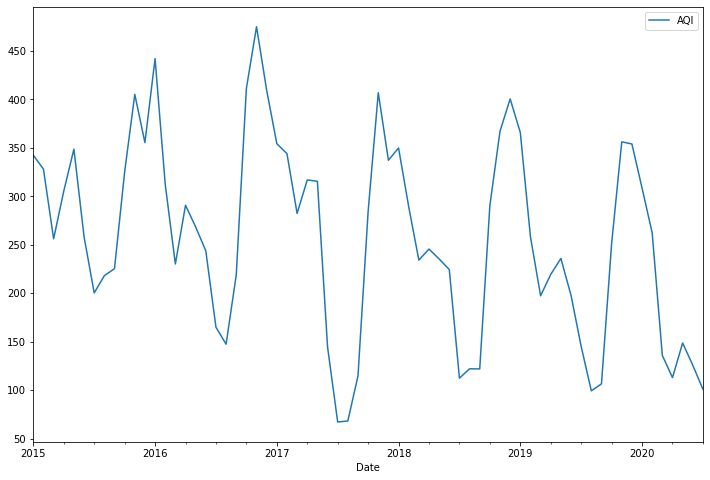

In [322]:
### resample은 시간 간격을 재조정한다. 시간 구간이 작아지면 데이터 양이 증가하고 시간구간이 커지면 데이터 양이 감소한다.
ts_m_avg = data.resample('MS').mean() # 각달의 첫날
ts_m_avg.plot()
plt.show()

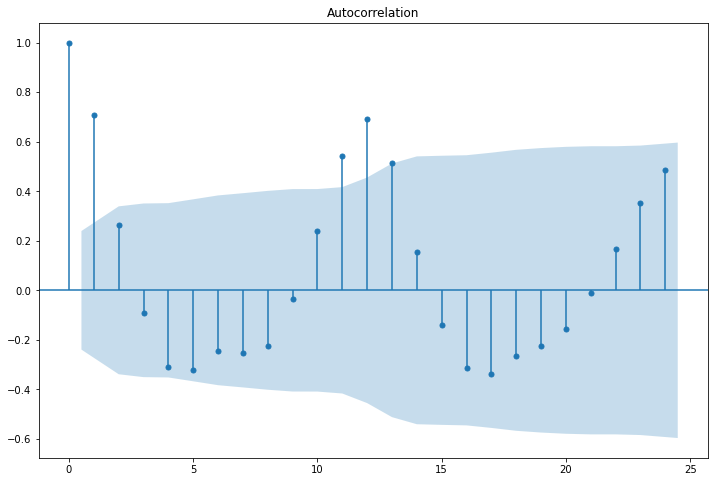

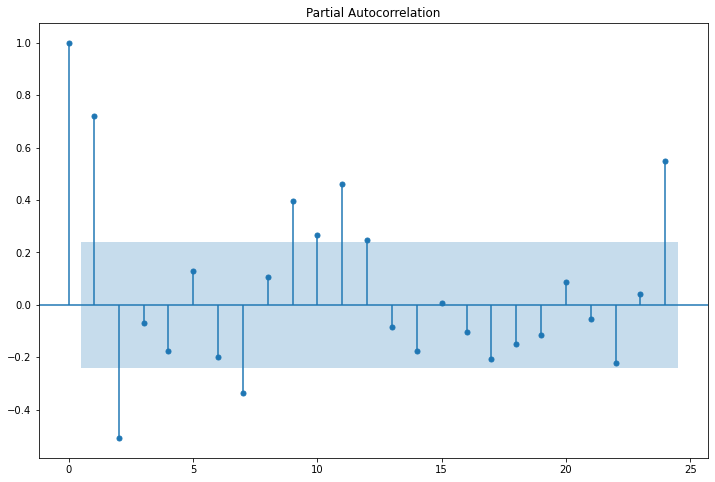

In [323]:
plot_acf(ts_m_avg, lags = 24)
plot_pacf(ts_m_avg, lags = 24)
plt.show()

In [324]:
from statsmodels.tsa.api import seasonal_decompose

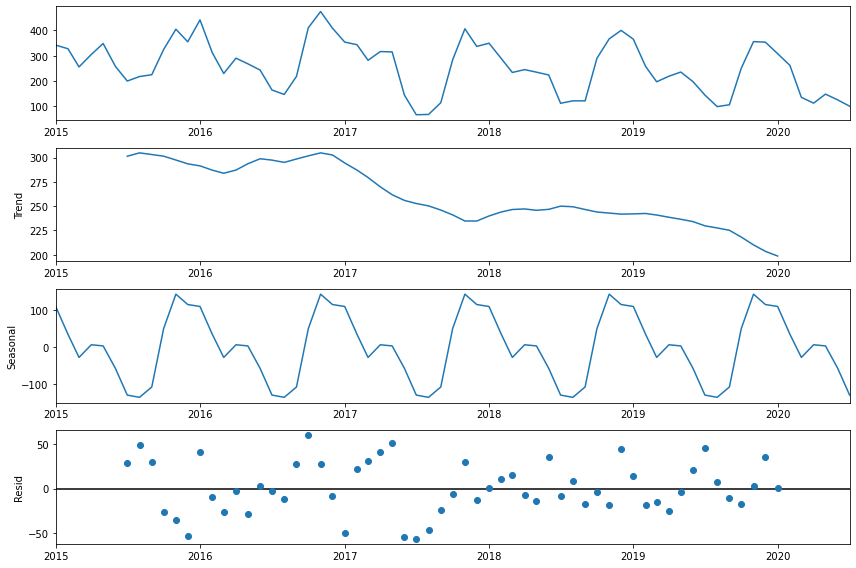

In [325]:
plt.rcParams['figure.figsize'] = (12, 8)
seasonal_decompose(ts_m_avg, model = 'additive').plot()
plt.show()

주기성이 12개월 간격으로 있기 때문에 lag가 12 필요해보인다. 

In [326]:
y = ts_m_avg
y12dif = ts_m_avg.diff(periods = 12).dropna()

result = adfuller(y, autolag = 'AIC')
print("원 데이터의 ADF 값 : {}".format(result[0]))
print('원 데이터의 P-value : {}\n'.format(result[1]))

result1 = adfuller(y12dif, autolag = None)
print("1차 차분 데이터의 ADF 값 : {}".format(result1[0]))
print('1차 차분 데이터의 P-value : {}'.format(result1[1]))

원 데이터의 ADF 값 : 0.22902373537469697
원 데이터의 P-value : 0.9738432644633124

1차 차분 데이터의 ADF 값 : -4.168722354337522
1차 차분 데이터의 P-value : 0.0007439978314500991


In [327]:
statistic, p_value, n_lags, critial_values = kpss(ts_m_avg)

print("KPSS Statistic : {}".format(statistic))
print("P-value : {}".format(p_value))
print("num_lags : {}".format(n_lags))
print("Critial_values : {}".format(critial_values))

KPSS Statistic : 0.6506685133613913
P-value : 0.018030135148964423
num_lags : 11
Critial_values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [328]:
statistic, p_value, n_lags, critial_values = kpss(y12dif)

print("KPSS Statistic : {}".format(statistic))
print("P-value : {}".format(p_value))
print("num_lags : {}".format(n_lags))
print("Critial_values : {}".format(critial_values))

KPSS Statistic : 0.1391057978510035
P-value : 0.1
num_lags : 11
Critial_values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [294]:
ts_m_avg = ts_m_avg.diff(12).dropna()

In [295]:
y_train = ts_m_avg.iloc[:48]
y_test = ts_m_avg.iloc[48:]

In [913]:
from itertools import product, combinations
from tqdm import tqdm
from statsmodels.tsa.api import SARIMAX

In [273]:
p, q = range(1,3), range(1,3)
d = range(0,1)
P, Q = range(1,3), range(1,3)
D = range(1,2)
m = 12
trend_pdq = list(product(p, d, q))
seasonal_pdq = [(candi[0], candi[1], candi[2], m) for candi in list(product(P, D, Q))]
## SARIMAX
AIC = []
SARIMAX_order = []
for trend_param in tqdm(trend_pdq):
    for seasonal_params in seasonal_pdq:
        try:
            result = SARIMAX(y_train, trend = 'c', 
                                   order = trend_param, seasonal_order = seasonal_params, exog = None).fit()
            print('Fit SARIMAX: trend_order={} seasonal_order={} AIC={}, BIC={}'.format(trend_param, seasonal_params, result.aic, result.bic, end='\r'))
            AIC.append(result.aic)
            SARIMAX_order.append([trend_param, seasonal_params])
        except:
            continue
## Parameter Selection
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_order[AIC.index(min(AIC))][0], SARIMAX_order[AIC.index(min(AIC))][1]))

  0%|          | 0/4 [00:00<?, ?it/s]

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=414.76085539774397, BIC=424.2619690284806
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=415.95363036212444, BIC=427.0382629313172
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(2, 1, 1, 12) AIC=415.29137061679955, BIC=426.3760031859923


 25%|██▌       | 1/4 [00:03<00:11,  3.97s/it]

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(2, 1, 2, 12) AIC=418.7120741700069, BIC=431.38022567765574
Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(1, 1, 1, 12) AIC=417.6843357648103, BIC=428.7689683340031
Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(1, 1, 2, 12) AIC=417.49468476564743, BIC=430.1628362732963
Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(2, 1, 1, 12) AIC=416.09586004516314, BIC=428.764011552812


 50%|█████     | 2/4 [00:08<00:09,  4.55s/it]

Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(2, 1, 2, 12) AIC=421.67322515243023, BIC=435.9248955985352
Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=416.2950065160246, BIC=427.3796390852174
Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=417.7922406069153, BIC=430.4603921145642
Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(2, 1, 1, 12) AIC=419.7682455886333, BIC=432.4363970962822


 75%|███████▌  | 3/4 [00:14<00:05,  5.13s/it]

Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(2, 1, 2, 12) AIC=419.5773977039148, BIC=433.8290681500198
Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(1, 1, 1, 12) AIC=416.6764005262413, BIC=429.3445520338902
Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(1, 1, 2, 12) AIC=417.20003127846525, BIC=431.4517017245702
Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(2, 1, 1, 12) AIC=422.3565081121597, BIC=436.6081785582647


100%|██████████| 4/4 [00:19<00:00,  4.98s/it]

Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(2, 1, 2, 12) AIC=420.3386476063103, BIC=436.1738369908714
The smallest AIC is 414.76085539774397 for model SARIMAX(1, 0, 1)x(1, 1, 1, 12)


In [274]:
print(f'ARMA 파라미터는 {SARIMAX_order[AIC.index(min(AIC))][0]}')
print(f'계절성 주기는 {SARIMAX_order[AIC.index(min(AIC))][1]}')

ARMA 파라미터는 (1, 0, 1)
계절성 주기는 (1, 1, 1, 12)


In [275]:
model = SARIMAX(y_train, trend='c', order=SARIMAX_order[AIC.index(min(AIC))][0], 
                                seasonal_order=SARIMAX_order[AIC.index(min(AIC))][1], exog=None).fit()
display(model.summary())

pred = model.get_forecast(len(y_test), exog=None).predicted_mean

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -201.380
Date:                            Fri, 04 Jun 2021   AIC                            414.761
Time:                                    10:34:16   BIC                            424.262
Sample:                                01-01-2016   HQIC                           418.077
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4686     11.575     -0.040      0.968     -23.155      22.218
ar.L1          0.3599      0.268      1.344      0.179      -0.165       0.885
ma.L1          0.2571      0.260      0.989      0.323      -0.253       0.767
ar.S.L12      -0.5625      0.297     -1.895      0.058      -1.144       0.019
ma.S.L12      -0.9896     67.062     -0.015      0.988    -132.429     130.450
sigma2      1875.3489   1.25e+05      0.015      0.988   -2.43e+05    2.47e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.54   Prob(JB):                         0.76
Heteroskedasticity (H):               0.40   Skew:                             0.19
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ljung-Box의 경우 0.05 보다 크므로 시계열 데이터의 잔차는 자기상관이 존재하지 않는다고 할 수 있다.

In [348]:
from statsmodels.stats.api import acorr_ljungbox
acorr_ljungbox(model.resid)

(array([5.33465015e-03, 4.70350217e-01, 8.19918350e-01, 1.70665113e+00,
        2.30304876e+00, 2.36283591e+00, 6.32524053e+00, 1.03476294e+01,
        1.07423721e+01, 1.10770408e+01, 1.16270050e+01, 1.59400859e+01,
        1.89892816e+01, 1.91375373e+01, 2.03805976e+01, 2.37193363e+01,
        2.38417345e+01, 2.38572377e+01, 2.39986391e+01, 2.41341672e+01,
        2.58439492e+01, 2.58671462e+01]),
 array([0.94177533, 0.79043243, 0.84469713, 0.78950909, 0.80581899,
        0.88349162, 0.50232692, 0.24146948, 0.29378223, 0.35154741,
        0.39232264, 0.19399568, 0.12343636, 0.15976018, 0.1578135 ,
        0.09581623, 0.12379936, 0.15976077, 0.19620456, 0.23658058,
        0.21246186, 0.25742981]))

In [276]:
print(f'SARIMA 모형의 RMSE = {np.sqrt(mean_squared_error(y_test["AQI"], pred))}')

SARIMA 모형의 RMSE = 50.70387343328784


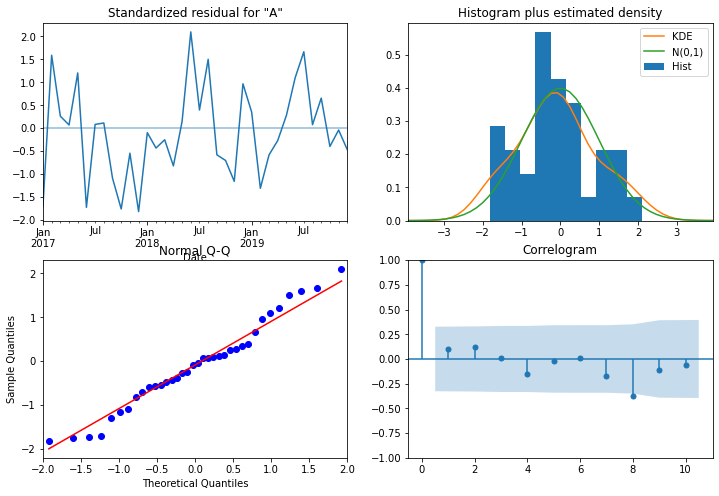

In [277]:
model.plot_diagnostics()
plt.show()

In [278]:
durbin_watson(model.resid)

1.9143140451924923

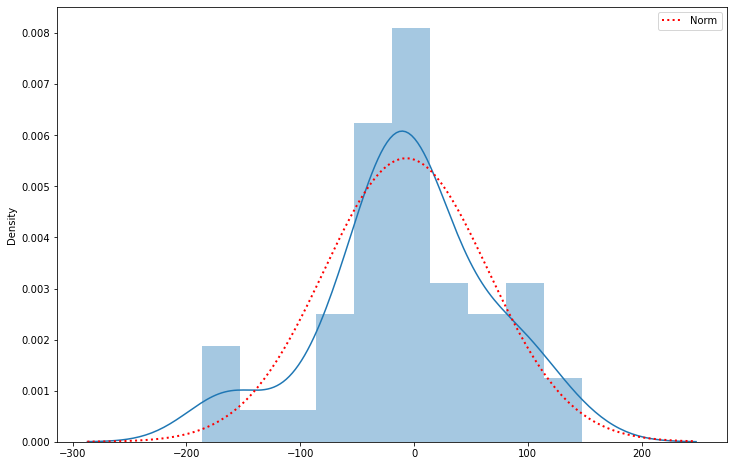

In [310]:
import seaborn as sns
from scipy import stats
sns.distplot(model.resid, norm_hist = True, fit = stats.norm, fit_kws = {'color' : 'red', 'linewidth' : 2, 'linestyle' : ':', 'label' : 'Norm'})
plt.legend()
plt.show()

잔차 또한 정규분포 형태를 보인다.

***
### 단순지수평활법
- data가 적을 때 사용

In [332]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [344]:
exp_model = ExponentialSmoothing(y_train, seasonal = 'add', seasonal_periods = 12, trend = None).fit(use_boxcox = False)

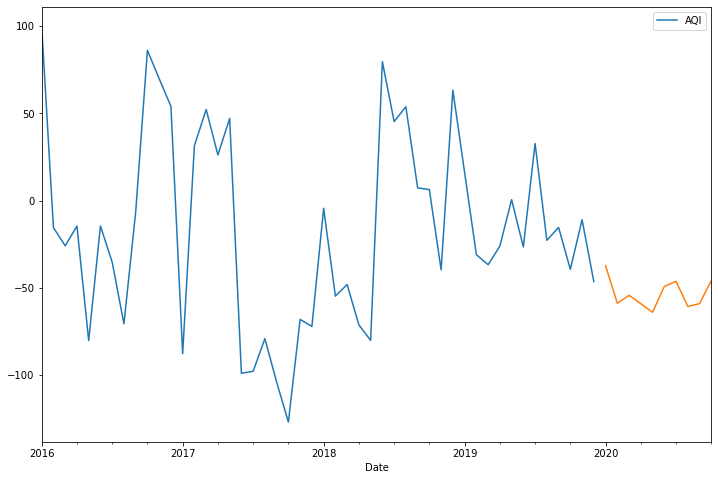

In [345]:
ax = y_train.plot()
exp_model.forecast(10).plot(ax = ax)
plt.show()

***
### VAR

In [899]:
data = pd.read_csv("solar_energy2.csv")

In [900]:
data.head()

,Unnamed: 0,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,2019-01-01 00:00:00,0,0,0,0,0,1.5,69.08,-12,0.0
1,2019-01-01 01:00:00,0,1,0,0,0,1.6,71.78,-12,0.0
2,2019-01-01 02:00:00,0,2,0,0,0,1.6,75.20,-12,0.0
3,2019-01-01 03:00:00,0,3,0,0,0,1.5,72.56,-11,0.0
4,2019-01-01 04:00:00,0,4,0,0,0,1.3,74.62,-11,0.0


In [901]:
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])

In [902]:
data.set_index('Unnamed: 0', inplace = True)

In [903]:
data = data.asfreq('H')

In [904]:
data = data.resample('D').mean()

In [905]:
data = data.iloc[:, 3:]

In [906]:
from statsmodels.tsa.api import VAR, VARMAX, VECM

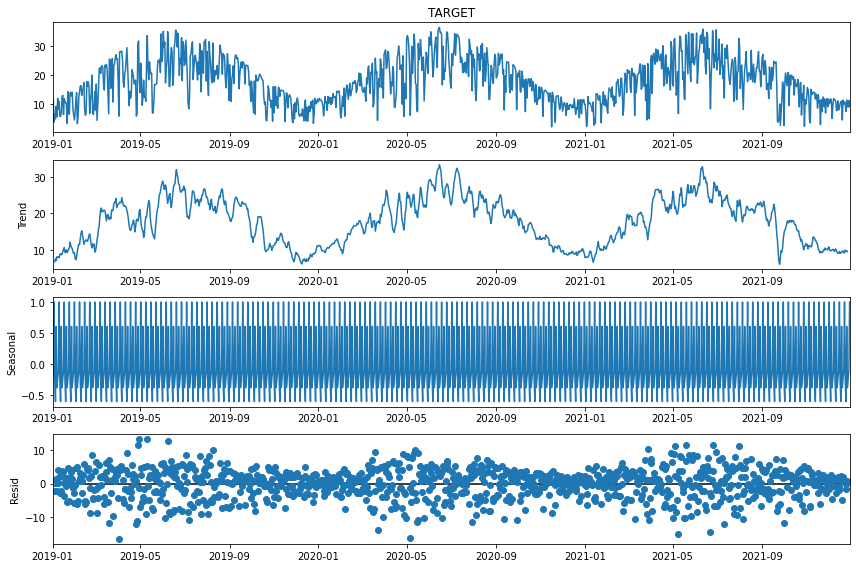

In [907]:
dec = seasonal_decompose(data['TARGET'])
dec.plot()
plt.show()

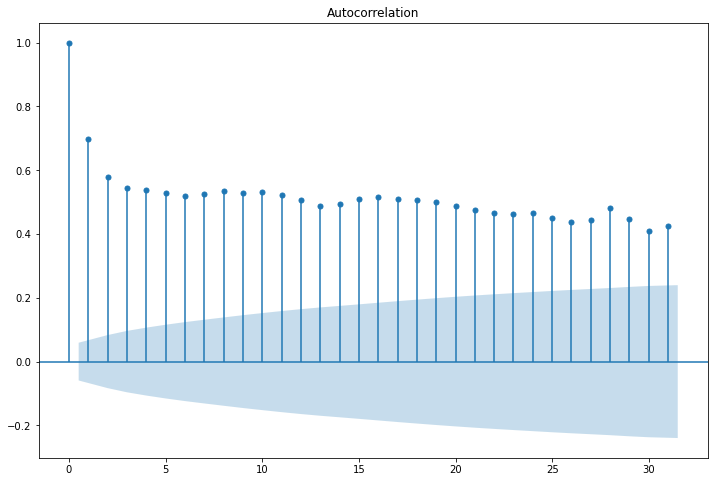

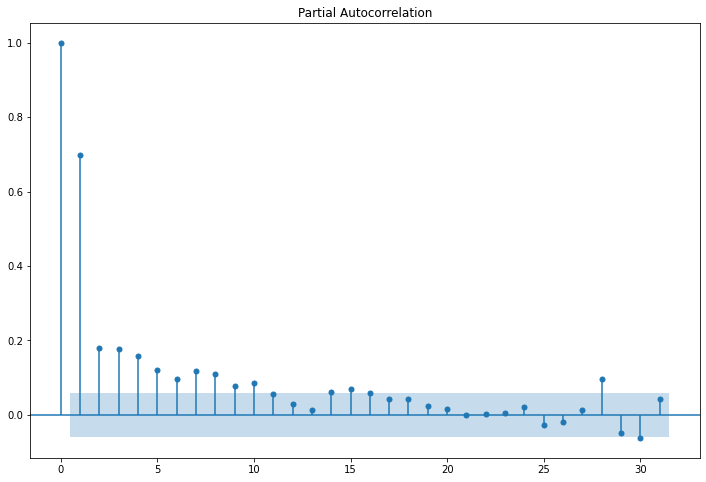

In [908]:
plot_acf(data['TARGET'])
plot_pacf(data['TARGET'])
plt.show()

In [909]:
adf = adfuller(data['TARGET'], autolag= "AIC")
print("ADF test statistic: {}".format(adf[0]))
print("p-value: {}".format(adf[1]))

ADF test statistic: -2.274684096005104
p-value: 0.18026287707994643


In [910]:
adf = adfuller(data['TARGET'].diff(1).dropna(), autolag= "AIC")
print("ADF test statistic: {}".format(adf[0]))
print("p-value: {}".format(adf[1]))

ADF test statistic: -13.091094008438734
p-value: 1.7878666423355944e-24


In [911]:
y_train = data.iloc[:1000].diff(1).dropna()
y_test = data.iloc[1000:]

In [767]:
forecasting_model = VAR(y_train, freq = 'D')
results_aic = []
for p in range(1,15):
    results = forecasting_model.fit(p)
    results_aic.append(results.aic)

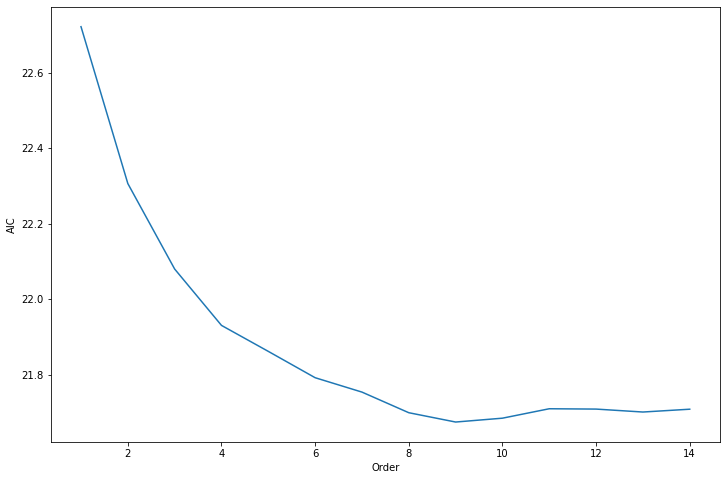

In [768]:
plt.plot(list(np.arange(1,15,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [769]:
results = forecasting_model.fit(9, ic = 'aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 04, Jun, 2021
Time:                     12:44:36
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    23.3071
Nobs:                     990.000    HQIC:                   22.2953
Log likelihood:          -18827.4    FPE:                2.59065e+09
AIC:                      21.6745    Det(Omega_mle):     1.87293e+09
--------------------------------------------------------------------
Results for equation DHI
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.061010         0.748252            0.082           0.935
L1.DHI           -0.906663         0.056039          -16.179           0.000
L1.DNI           -0.091954         0.026371           -3.487           0.000
L

In [778]:
pred = results.forecast(y = y_train.values, steps = 95)

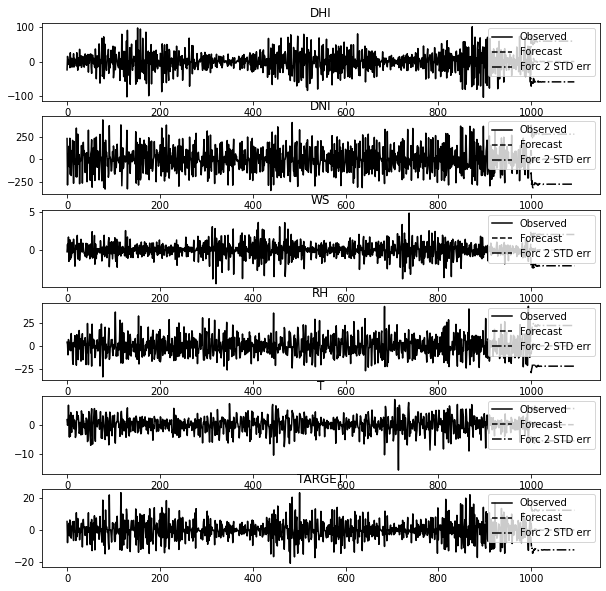

In [779]:
results.plot_forecast(95)
plt.show()

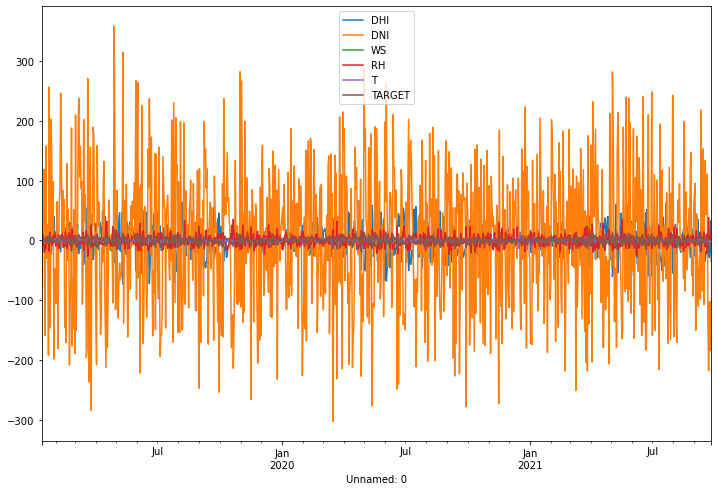

In [780]:
results.resid.plot()
plt.show()

In [781]:
durbin_watson(results.resid)

array([2.01219699, 2.01760672, 2.00330917, 2.00144604, 2.01273822,
       2.01183919])

대부분 2에 근사해 자기상관이 없다.

In [782]:
pred_df = pd.DataFrame(pred, columns = data.columns, index = y_test.index)

In [783]:
for c in data.columns.tolist() :
    pred_df[c] = pred_df[c].cumsum() + data.iloc[-95][c]

In [784]:
for c in pred_df.columns.tolist() :
    print(np.sqrt(mean_squared_error(y_test[c], pred_df[c])))

47.23175531502933
135.38872407919362
0.8832297446148372
16.751831162605892
7.648522622920689
4.965634197456297


In [916]:
p, q = range(1,3), range(1,3)
d = range(0,1)
P, Q = range(1,3), range(1,3)
D = range(1,2)
m = 12
trend_pdq = list(product(p, d, q))
seasonal_pdq = [(candi[0], candi[1], candi[2], m) for candi in list(product(P, D, Q))]
## SARIMAX
AIC = []
SARIMAX_order = []
for trend_param in tqdm(trend_pdq):
    for seasonal_params in seasonal_pdq:
        try:
            result = SARIMAX(y_train['TARGET'], trend = 'c', 
                                   order = trend_param, seasonal_order = seasonal_params, exog = y_train.iloc[:, :-1]).fit()
            print('Fit SARIMAX: trend_order={} seasonal_order={} AIC={}, BIC={}'.format(trend_param, seasonal_params, result.aic, result.bic, end='\r'))
            AIC.append(result.aic)
            SARIMAX_order.append([trend_param, seasonal_params])
        except:
            continue
## Parameter Selection
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_order[AIC.index(min(AIC))][0], SARIMAX_order[AIC.index(min(AIC))][1]))

  0%|          | 0/4 [00:00<?, ?it/s]

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=3817.850209084637, BIC=3871.691579518405
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=3812.131120564027, BIC=3870.8671610372285
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(2, 1, 1, 12) AIC=3876.3408672737824, BIC=3935.076907746984


 25%|██▌       | 1/4 [02:02<06:07, 122.50s/it]

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(2, 1, 2, 12) AIC=3811.566691402196, BIC=3875.197401914831
Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(1, 1, 1, 12) AIC=3870.231642168913, BIC=3928.9676826421146
Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(1, 1, 2, 12) AIC=3820.5833802620195, BIC=3884.214090774655
Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(2, 1, 1, 12) AIC=3886.8228763330367, BIC=3950.453586845672


 50%|█████     | 2/4 [04:11<04:12, 126.37s/it]

Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(2, 1, 2, 12) AIC=3827.6954918129804, BIC=3896.220872365049
Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=3836.8260078600733, BIC=3895.562048333275
Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=3812.7808640549174, BIC=3876.4115745675526
Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(2, 1, 1, 12) AIC=3865.685671594152, BIC=3929.3163821067874


 75%|███████▌  | 3/4 [06:21<02:07, 127.78s/it]

Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(2, 1, 2, 12) AIC=3811.057200349494, BIC=3879.582580901563
Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(1, 1, 1, 12) AIC=3842.2493500691817, BIC=3905.880060581817
Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(1, 1, 2, 12) AIC=3822.0953380223846, BIC=3890.6207185744533
Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(2, 1, 1, 12) AIC=3896.6157229886303, BIC=3965.141103540699


100%|██████████| 4/4 [08:30<00:00, 127.69s/it]

Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(2, 1, 2, 12) AIC=3819.232186307213, BIC=3892.6522368987153
The smallest AIC is 3811.057200349494 for model SARIMAX(2, 0, 1)x(2, 1, 2, 12)


In [917]:
print(f'ARMA 파라미터는 {SARIMAX_order[AIC.index(min(AIC))][0]}')
print(f'계절성 주기는 {SARIMAX_order[AIC.index(min(AIC))][1]}')

ARMA 파라미터는 (2, 0, 1)
계절성 주기는 (2, 1, 2, 12)


In [919]:
model = SARIMAX(y_train['TARGET'], trend = 'c', order = SARIMAX_order[AIC.index(min(AIC))][0], 
                                seasonal_order = SARIMAX_order[AIC.index(min(AIC))][1], exog = y_train.iloc[:, :-1]).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                  TARGET   No. Observations:                  999
Model:             SARIMAX(2, 0, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1891.529
Date:                                 Fri, 04 Jun 2021   AIC                           3811.057
Time:                                         13:35:49   BIC                           3879.583
Sample:                                     01-02-2019   HQIC                          3837.118
                                          - 09-26-2021                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0004      0.003     -0.136      0.892      -0.007       0.006
DHI            0.0706      0.003     26.763      0.000       0.065       0.076
DNI            0.0498      0.001     89.261      0.000       0.049       0.051
WS            -0.0032      0.062     -0.052      0.959      -0.124       0.117
RH          9.568e-05      0.007      0.014      0.989      -0.013       0.013
T              0.0579      0.019      3.126      0.002       0.022       0.094
ar.L1          0.1904      0.036      5.221      0.000       0.119       0.262
ar.L2         -0.0242      0.035     -0.688      0.492      -0.093       0.045
ma.L1         -0.8688      0.024    -36.514      0.000      -0.915      -0.822
ar.S.L12      -0.6744     12.126     -0.056      0.956     -24.440      23.091
ar.S.L24       0.0213      0.406      0.052      0.958      -0.774       0.817
ma.S.L12      -0.2555     12.128     -0.021      0.983     -24.027      23.516
ma.S.L24      -0.6790     11.667     -0.058      0.954     -23.545      22.187
sigma2         2.6291      0.138     19.094      0.000       2.359       2.899
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.66   Prob(JB):                         0.28
Heteroskedasticity (H):               1.11   Skew:                            -0.01
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [922]:
pred = model.get_forecast(len(y_test), exog = y_train.iloc[-y_test.shape[0]:,:-1]).predicted_mean

In [936]:
p = model.get_prediction(start = y_test.index[0], end = y_test.index[-1], exog = y_train.iloc[-95:, :-1])

위 두개는 동일한 결과

In [945]:
print(np.sqrt(mean_squared_error(y_test["TARGET"], pred)))

14.043608554534208


Ljung-Box의 경우 0.05 보다 크므로 시계열 데이터의 잔차는 자기상관이 존재하지 않는다고 할 수 있다.

In [941]:
from statsmodels.stats.api import acorr_ljungbox
acorr_ljungbox(model.resid)

(array([ 0.11858129,  0.88877949,  2.82042424,  4.80672443,  5.01102507,
         6.25737908,  8.10133027,  9.52884065,  9.56879494, 14.31161602,
        21.74094956, 21.85955285, 21.91926975, 23.09747304, 24.0045809 ,
        24.46374924, 24.75640398, 27.27975397, 27.35466093, 30.85335913,
        32.20251557, 32.58720568, 34.32702722, 34.53168105, 36.05905607,
        36.48035244, 36.49193011, 37.32616644, 40.05135776, 41.39146191,
        42.63647491, 43.44517878, 43.47074695, 43.83791057, 43.91407184,
        43.91500508, 45.27994702, 47.47689034, 47.80036329, 51.60638446]),
 array([0.73057832, 0.64121546, 0.42014875, 0.30770973, 0.41453616,
        0.39498465, 0.32374362, 0.29966304, 0.3865069 , 0.15924642,
        0.02645872, 0.03912437, 0.05662532, 0.05870202, 0.06501574,
        0.07985368, 0.10029637, 0.0738958 , 0.09665943, 0.05715636,
        0.05584258, 0.0679214 , 0.06057507, 0.0756535 , 0.07070855,
        0.08318239, 0.10494836, 0.11184021, 0.0831007 , 0.08060451,
      

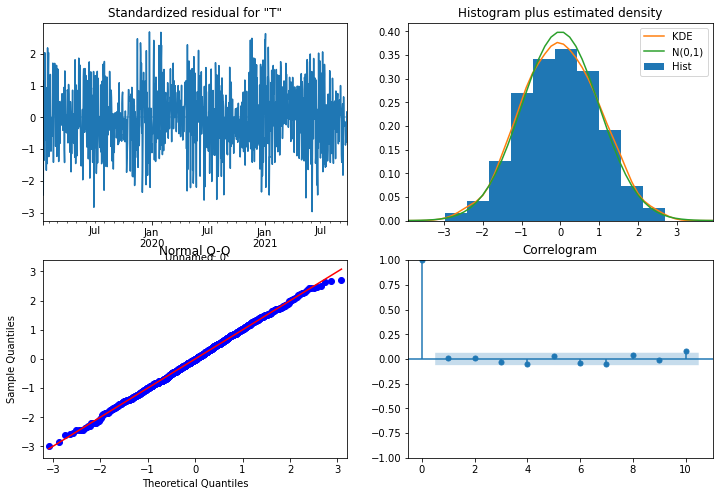

In [947]:
model.plot_diagnostics()
plt.show()

In [948]:
durbin_watson(model.resid)

2.014558760870005

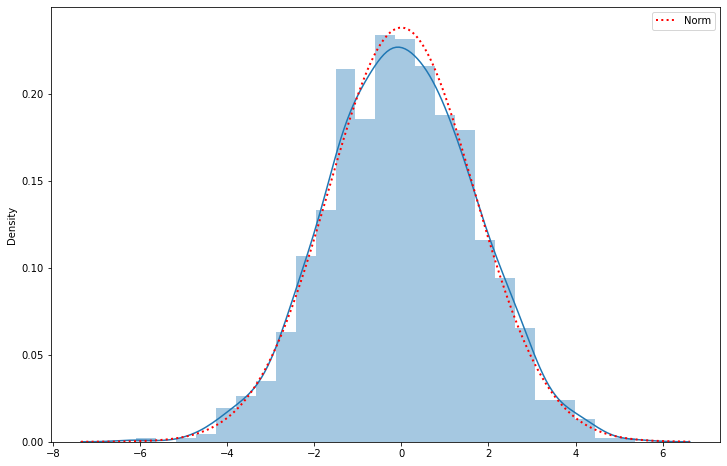

In [949]:
import seaborn as sns
from scipy import stats
sns.distplot(model.resid, norm_hist = True, fit = stats.norm, fit_kws = {'color' : 'red', 'linewidth' : 2, 'linestyle' : ':', 'label' : 'Norm'})
plt.legend()
plt.show()

잔차 또한 정규분포 형태를 보인다.

***
### VARMAX

In [870]:
forecasting_model = VARMAX(y_train[['DNI','DHI']], freq = 'D', exog = y_train[['WS', 'RH', 'T', 'TARGET']])

In [871]:
results = forecasting_model.fit()

In [872]:
results.summary()

Dep. Variable:,"['DNI', 'DHI']",No. Observations:,999
Model:,VARX(1),Log Likelihood,-9632.542
,+ intercept,AIC,19299.083
Date:,"Fri, 04 Jun 2021",BIC,19382.498
Time:,13:13:31,HQIC,19330.788
Sample:,01-02-2019,,
,- 09-26-2021,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"57.46, 60.86",Jarque-Bera (JB):,"168.10, 82.81"
Prob(Q):,"0.00, 0.00",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.91, 0.93",Skew:,"0.26, 0.08"


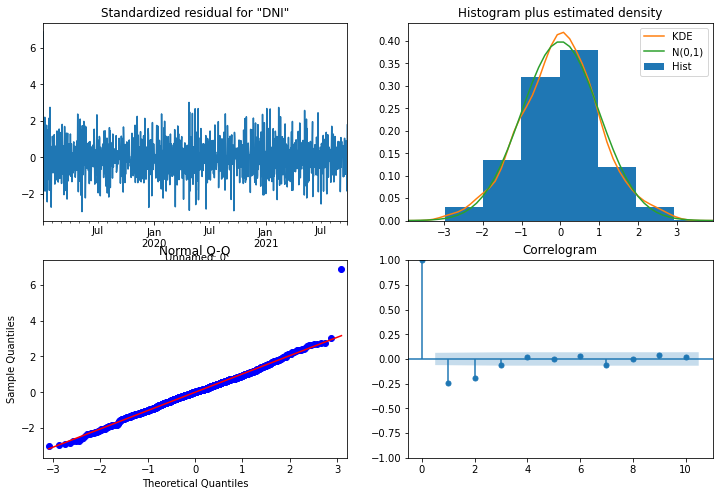

In [876]:
results.plot_diagnostics()
plt.show()

In [877]:
durbin_watson(results.resid)

array([2.42517303, 2.2690087 ])

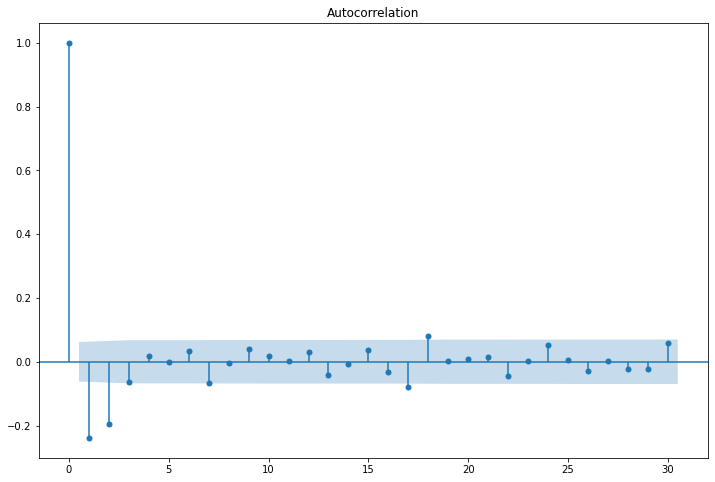

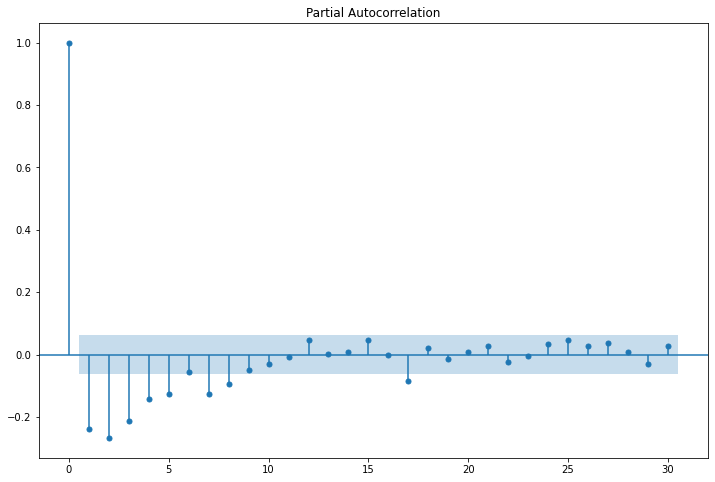

In [886]:
plot_acf(results.resid.DNI)
plot_pacf(results.resid.DNI)
plt.show()

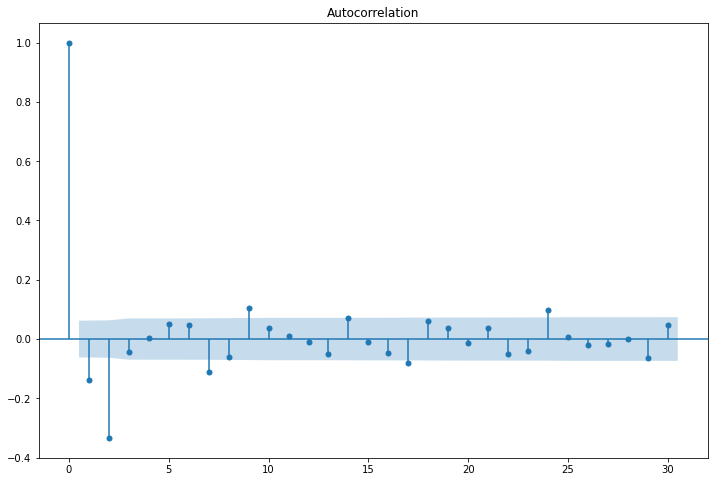

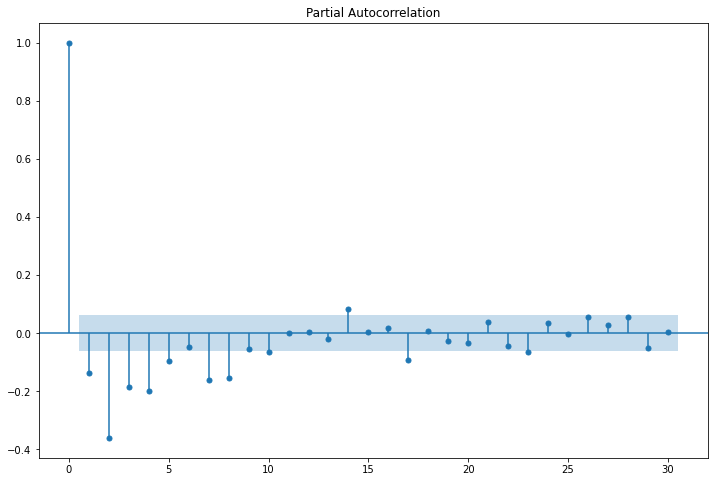

In [887]:
plot_acf(results.resid.DHI)
plot_pacf(results.resid.DHI)
plt.show()